<a href="https://colab.research.google.com/github/honey-python-world/Covid-19-Analysis-in-india/blob/main/Covid_19_Analysis_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [62]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8

In [63]:


import cufflinks as cf
import plotly.offline as pyo
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
 
import folium

In [64]:
df1=pd.read_csv(r"/content/drive/MyDrive/Covid-19 analysis/new data set/covid_india.csv")
df1.head()

,S. No.,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,1,Andaman and Nicobar,108,7128,127,7363
1,2,Andhra Pradesh,67629,1759390,12224,1839243
2,3,Arunachal Pradesh,2599,29934,159,32692
3,4,Assam,36978,436043,4138,477159
4,5,Bihar,3548,705967,9536,719051


In [65]:
df1 = df1.rename(columns={'Cured/Discharged/Migrated':'Cured','Total Confirmed cases':'Total Cases'})
df1

,S. No.,Name of State / UT,Active Cases,Cured,Deaths,Total Cases
0,1,Andaman and Nicobar,108,7128,127,7363
1,2,Andhra Pradesh,67629,1759390,12224,1839243
2,3,Arunachal Pradesh,2599,29934,159,32692
3,4,Assam,36978,436043,4138,477159
4,5,Bihar,3548,705967,9536,719051
5,6,Chandigarh,431,60123,804,61358
6,7,Chhattisgarh,10062,966414,13368,989844
7,8,Dadra and Nagar Haveli and Daman and Diu,71,10425,4,10500
8,9,Delhi,2445,1404688,24900,1432033
9,10,Goa,3599,157353,2975,163927


In [66]:
df1.tail()

,S. No.,Name of State / UT,Active Cases,Cured,Deaths,Total Cases
31,32,Telengana,19029,588259,3546,610834
32,33,Tripura,4715,56425,642,61782
33,34,Uttar Pradesh,5343,1676458,22081,1703882
34,35,Uttarakhand,3231,328040,7017,338288
35,36,West Bengal,22691,1437106,17240,1477037


In [67]:
df1.style.background_gradient(cmap='Blues')

,S. No.,Name of State / UT,Active Cases,Cured,Deaths,Total Cases
0,1,Andaman and Nicobar,108,7128,127,7363
1,2,Andhra Pradesh,67629,1759390,12224,1839243
2,3,Arunachal Pradesh,2599,29934,159,32692
3,4,Assam,36978,436043,4138,477159
4,5,Bihar,3548,705967,9536,719051
5,6,Chandigarh,431,60123,804,61358
6,7,Chhattisgarh,10062,966414,13368,989844
7,8,Dadra and Nagar Haveli and Daman and Diu,71,10425,4,10500
8,9,Delhi,2445,1404688,24900,1432033
9,10,Goa,3599,157353,2975,163927


In [68]:
Total_Active_Cases=df1.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()

In [69]:
#Total_vaccinated.drop(['India'],inplace=True)
Total_Active_Cases.drop(['Dadra and Nagar Haveli and Daman and Diu'],inplace=True)
Total_Active_Cases

,Total Cases
Name of State / UT,
Maharashtra,5954508
Karnataka,2796121
Kerala,2785304
Tamil Nadu,2406497
Andhra Pradesh,1839243
Uttar Pradesh,1703882
West Bengal,1477037
Delhi,1432033
Chhattisgarh,989844


In [70]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Total Cases
Name of State / UT,
Maharashtra,5954508
Karnataka,2796121
Kerala,2785304
Tamil Nadu,2406497
Andhra Pradesh,1839243
Uttar Pradesh,1703882
West Bengal,1477037
Delhi,1432033
Chhattisgarh,989844


In [71]:

Total_Death_Cases=df1.groupby('Name of State / UT')['Deaths'].sum().sort_values(ascending=False).to_frame()
Total_Death_Cases.drop(['Dadra and Nagar Haveli and Daman and Diu'],inplace=True)
Total_Death_Cases

,Deaths
Name of State / UT,
Maharashtra,116674
Karnataka,33602
Tamil Nadu,30835
Delhi,24900
Uttar Pradesh,22081
West Bengal,17240
Punjab,15771
Chhattisgarh,13368
Andhra Pradesh,12224


In [72]:
Total_Death_Cases.style.background_gradient(cmap='Blues')

,Deaths
Name of State / UT,
Maharashtra,116674
Karnataka,33602
Tamil Nadu,30835
Delhi,24900
Uttar Pradesh,22081
West Bengal,17240
Punjab,15771
Chhattisgarh,13368
Andhra Pradesh,12224


# **Data for vaccanations in india**

In [73]:
df2= pd.read_csv(r"/content/drive/MyDrive/Covid-19 analysis/new data set/covid_vaccine_statewise.csv")
df2

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,04/06/2021,West Bengal,11795260.0,937852.0,2500.0,11795260.0,3931230.0,6615547.0,5178013.0,1700.0,1749972.0,13976518.0,0.0,1210.0,2874071.0,4810523.0,4107132.0,15726490.0
5324,05/06/2021,West Bengal,12090072.0,981547.0,2517.0,12090072.0,3941080.0,6784722.0,5303588.0,1762.0,1806377.0,14224775.0,0.0,1211.0,2999339.0,4927157.0,4159589.0,16031152.0
5325,06/06/2021,West Bengal,12206706.0,479793.0,1016.0,12206706.0,3943243.0,6851075.0,5353848.0,1783.0,1825771.0,14324178.0,0.0,1214.0,3058135.0,4968447.0,4175911.0,16149949.0
5326,07/06/2021,West Bengal,12492937.0,1062959.0,2523.0,12492937.0,3960942.0,7014307.0,5476794.0,1836.0,1878776.0,14575103.0,0.0,1223.0,3174029.0,5087762.0,4226545.0,16453879.0


In [74]:
df2 = df2.rename(columns={'Total Individuals Vaccinated':'Total Vaccinated','Updated On':'Date'})
df2

,Date,State,Total Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,04/06/2021,West Bengal,11795260.0,937852.0,2500.0,11795260.0,3931230.0,6615547.0,5178013.0,1700.0,1749972.0,13976518.0,0.0,1210.0,2874071.0,4810523.0,4107132.0,15726490.0
5324,05/06/2021,West Bengal,12090072.0,981547.0,2517.0,12090072.0,3941080.0,6784722.0,5303588.0,1762.0,1806377.0,14224775.0,0.0,1211.0,2999339.0,4927157.0,4159589.0,16031152.0
5325,06/06/2021,West Bengal,12206706.0,479793.0,1016.0,12206706.0,3943243.0,6851075.0,5353848.0,1783.0,1825771.0,14324178.0,0.0,1214.0,3058135.0,4968447.0,4175911.0,16149949.0
5326,07/06/2021,West Bengal,12492937.0,1062959.0,2523.0,12492937.0,3960942.0,7014307.0,5476794.0,1836.0,1878776.0,14575103.0,0.0,1223.0,3174029.0,5087762.0,4226545.0,16453879.0


In [75]:
Total_vaccinated=df2.groupby('State')['Total Vaccinated'].sum().sort_values(ascending=False).to_frame()
#Total_vaccinated
Total_vaccinated.style.background_gradient(cmap='Greens')

,Total Vaccinated
State,
India,9799454695.000000
Maharashtra,1036215855.000000
Rajasthan,852909286.000000
Uttar Pradesh,850608986.000000
Gujarat,797680677.000000
West Bengal,683964914.000000
Karnataka,616699028.000000
Madhya Pradesh,549945883.000000
Bihar,475005882.000000


In [76]:
Total_vaccinated.drop(['India'],inplace=True)
Total_vaccinated.drop(['Dadra and Nagar Haveli and Daman and Diu'],inplace=True)

In [77]:

Total_vaccinated.style.background_gradient(cmap='Greens')

,Total Vaccinated
State,
Maharashtra,1036215855.000000
Rajasthan,852909286.000000
Uttar Pradesh,850608986.000000
Gujarat,797680677.000000
West Bengal,683964914.000000
Karnataka,616699028.000000
Madhya Pradesh,549945883.000000
Bihar,475005882.000000
Kerala,461489358.000000


# **Graphical Represenataion** 

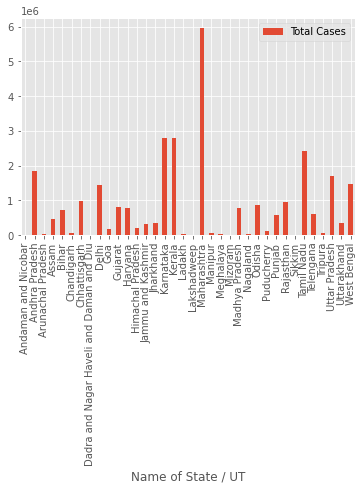

<Figure size 1440x360 with 0 Axes>

In [78]:

import matplotlib.pyplot as plt
#plt.figure(figsize=(20,5))
df1.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.figure(figsize=(20,5))
plt.show()

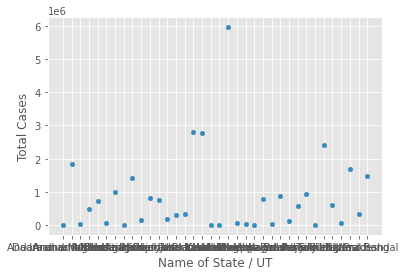

<Figure size 1440x360 with 0 Axes>

In [79]:
df1.plot(kind='scatter',x='Name of State / UT',y='Total Cases')
plt.figure(figsize=(20,5))
plt.show()

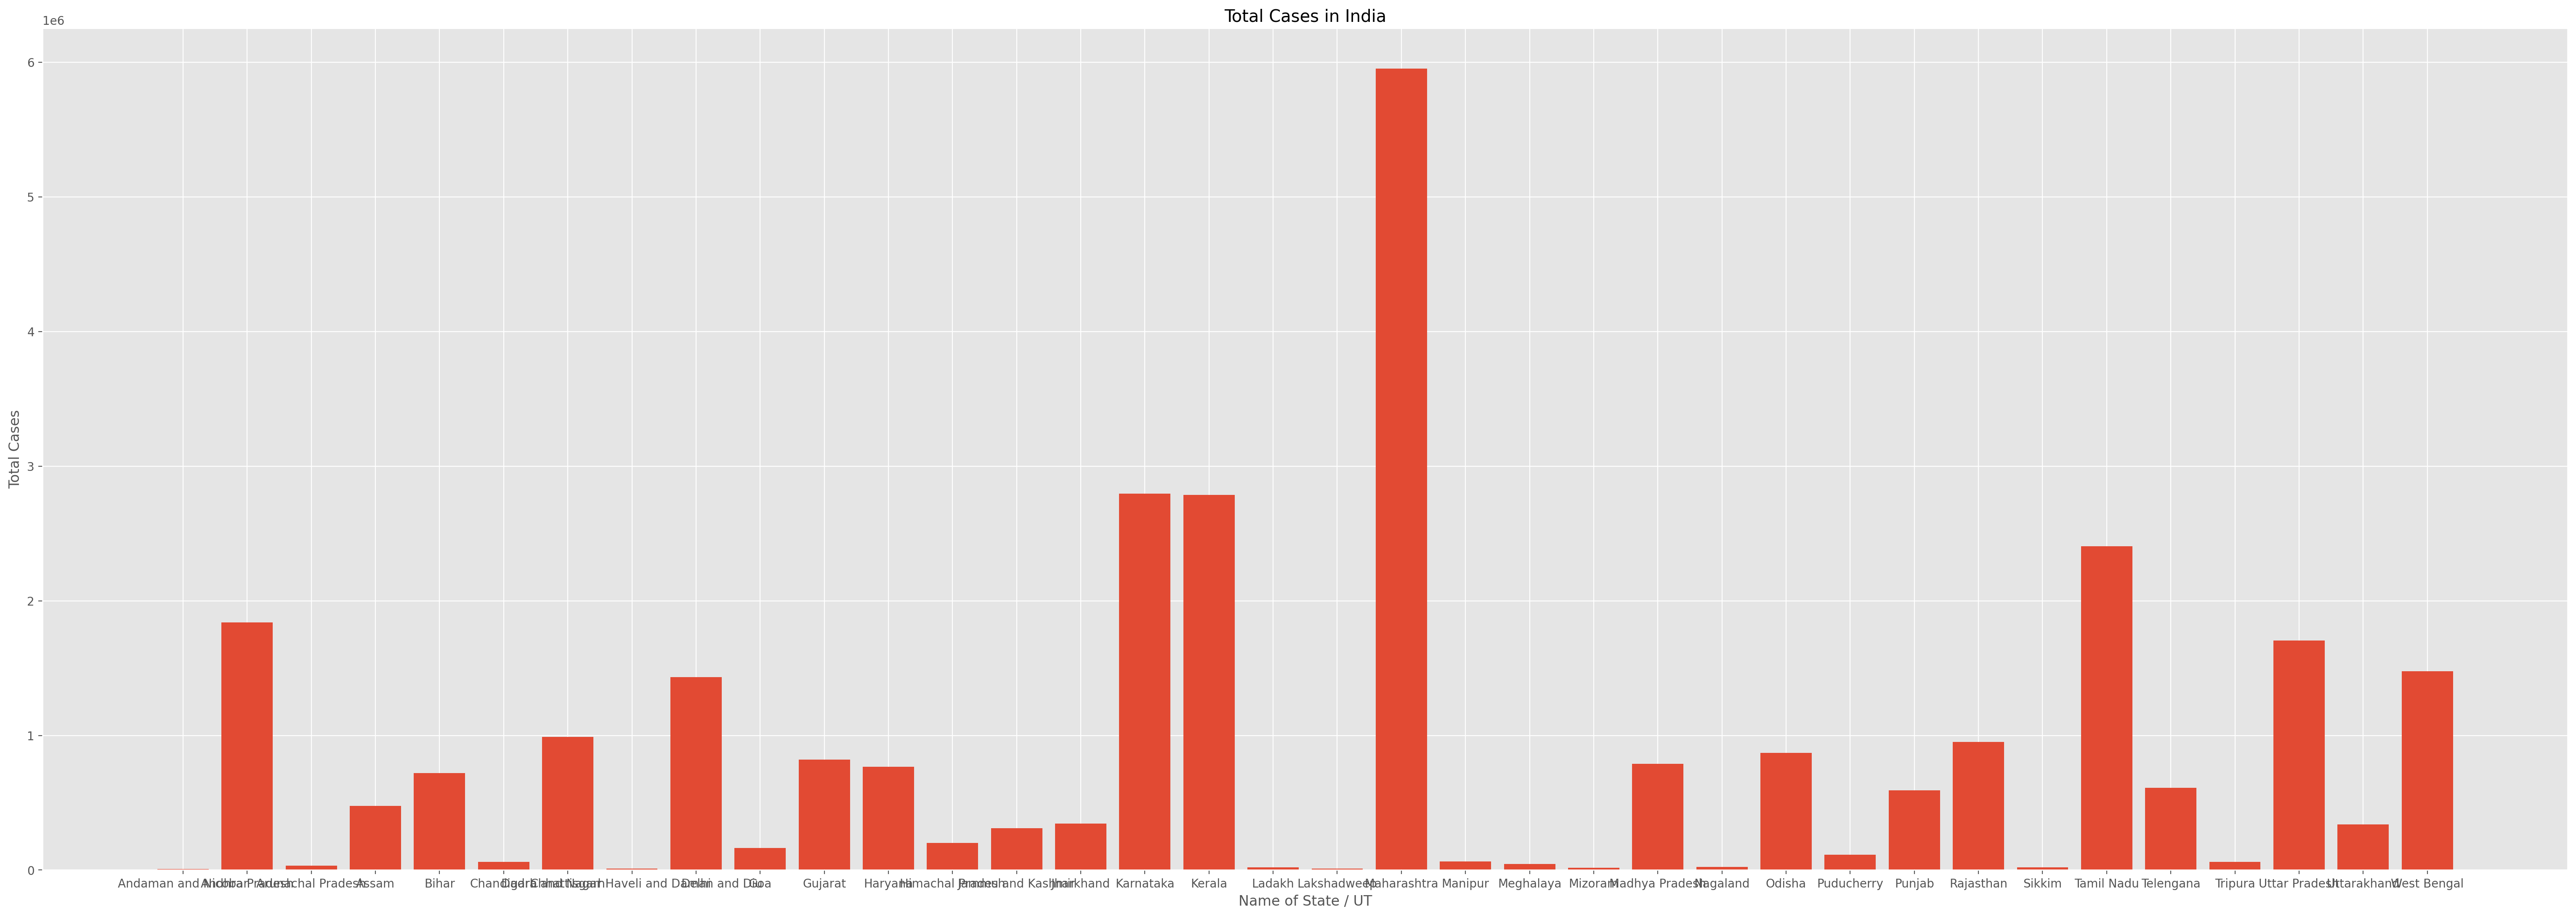

In [80]:
#Matplotlib
fig=plt.figure(figsize=(30,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df1['Name of State / UT'],df1['Total Cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.show()

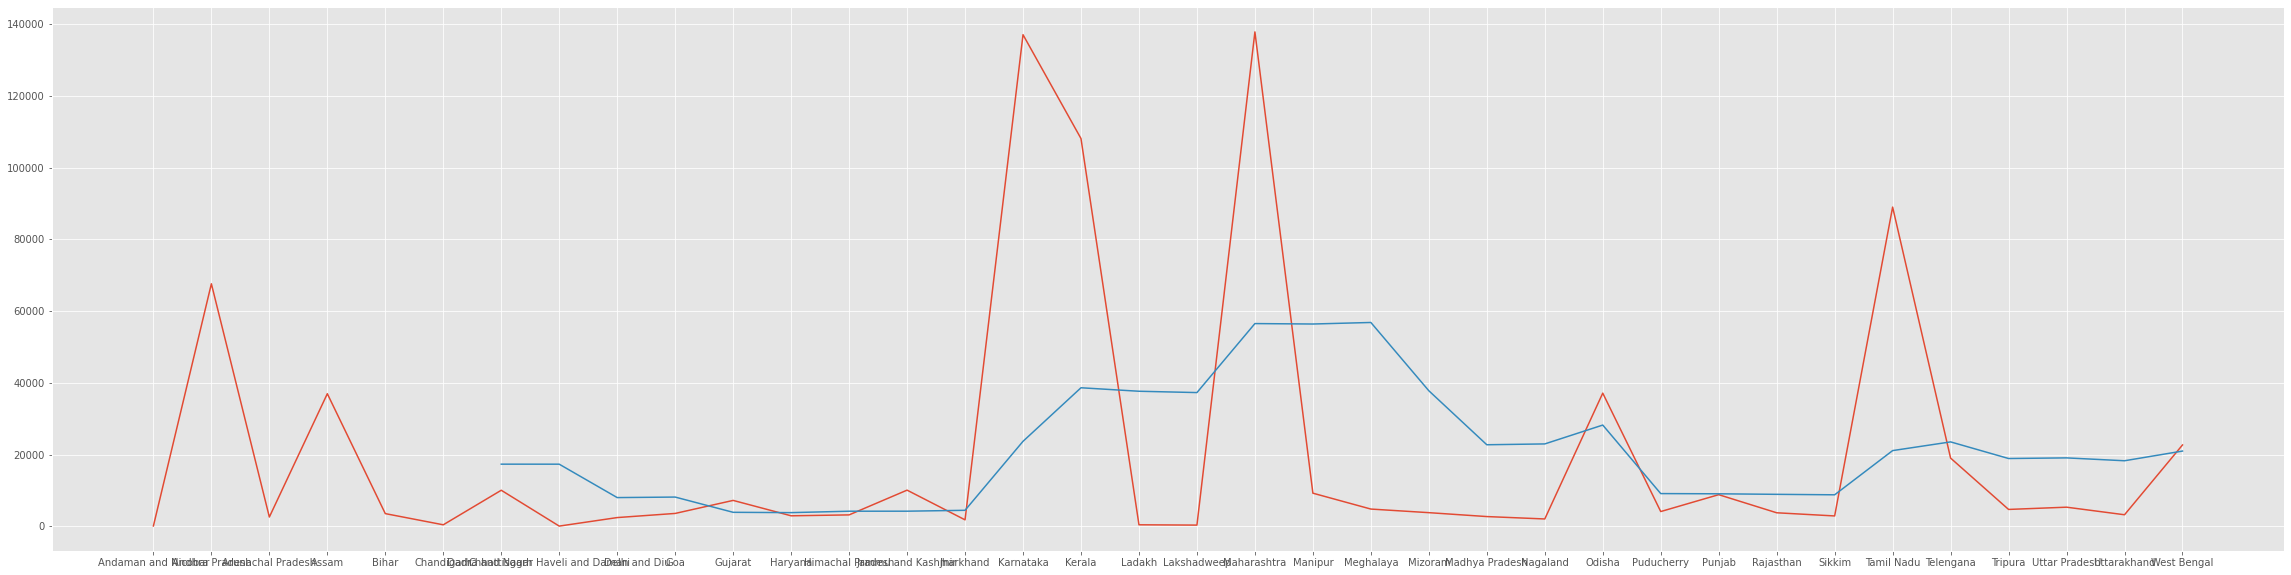

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
plt.plot(df1['Name of State / UT'],df1['Active Cases'])
plt.plot(df1['Name of State / UT'],df1['Active Cases'].rolling(7).mean())

In [82]:
df2 = df2.rename(columns={'Total Vaccinated':'y','Date':'ds'})
df2

,ds,State,y,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,04/06/2021,West Bengal,11795260.0,937852.0,2500.0,11795260.0,3931230.0,6615547.0,5178013.0,1700.0,1749972.0,13976518.0,0.0,1210.0,2874071.0,4810523.0,4107132.0,15726490.0
5324,05/06/2021,West Bengal,12090072.0,981547.0,2517.0,12090072.0,3941080.0,6784722.0,5303588.0,1762.0,1806377.0,14224775.0,0.0,1211.0,2999339.0,4927157.0,4159589.0,16031152.0
5325,06/06/2021,West Bengal,12206706.0,479793.0,1016.0,12206706.0,3943243.0,6851075.0,5353848.0,1783.0,1825771.0,14324178.0,0.0,1214.0,3058135.0,4968447.0,4175911.0,16149949.0
5326,07/06/2021,West Bengal,12492937.0,1062959.0,2523.0,12492937.0,3960942.0,7014307.0,5476794.0,1836.0,1878776.0,14575103.0,0.0,1223.0,3174029.0,5087762.0,4226545.0,16453879.0


# Forecasting The Vacanation In  India For 30 Days





INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


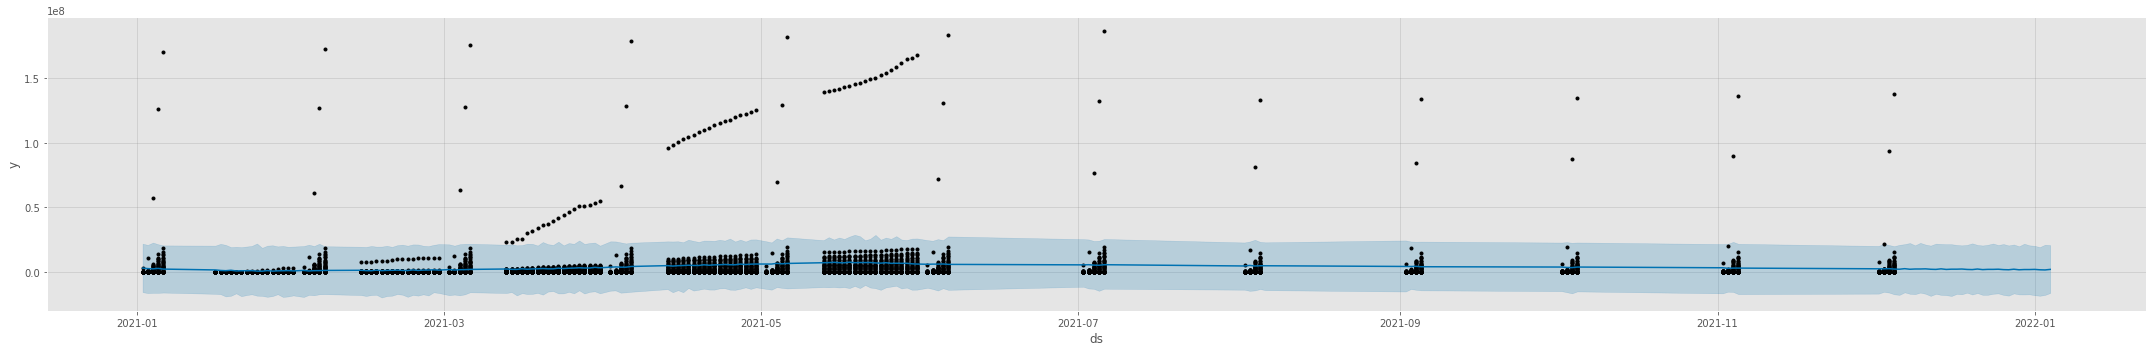

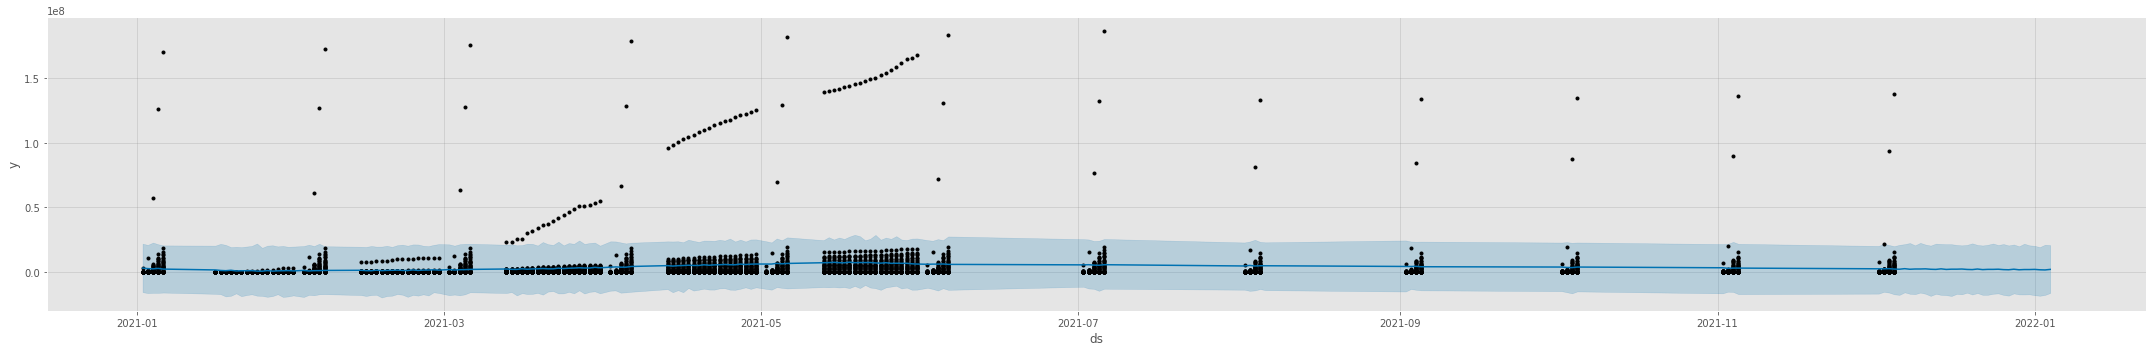

In [83]:
#Forecasting using FbProphet for 30 days
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df2)
x = model.make_future_dataframe(periods = 30,freq='D')
forecast = model.predict(x)
df2= forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
model.plot(forecast,figsize=(30,5))

For  forcasting the Active Cases , Cured Cases and Death cases  Here iam taking one more data set which contains Date and Time 

In [84]:
import pandas as pd
df3= pd.read_csv(r"/content/drive/MyDrive/Covid-19 analysis/new data set/covid_19_india.csv")
df3

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083


In [85]:
df3 = df3.rename(columns={'Confirmed':'Total Cases','State/UnionTerritory':'State/UT'})
df3

,Sno,Date,Time,State/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total Cases
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083


In [86]:
df3['Active Cases']=df3['Total Cases']-(df3['Deaths']+df3['Cured'])
df3

,Sno,Date,Time,State/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total Cases,Active Cases
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103,25406
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169,6018
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419,14122
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083,15681


# Forcasting Active cases for 30 days


In [87]:
df3 = df3.rename(columns={'Active Cases':'y','Date':'ds'})
df3

,Sno,ds,Time,State/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total Cases,y
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103,25406
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169,6018
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419,14122
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083,15681


In [88]:
df3.tail()

,Sno,ds,Time,State/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Total Cases,y
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103,25406
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169,6018
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419,14122
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083,15681
15805,15806,2021-06-08,8:00 AM,West Bengal,-,-,1388771,16362,1432019,26886


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


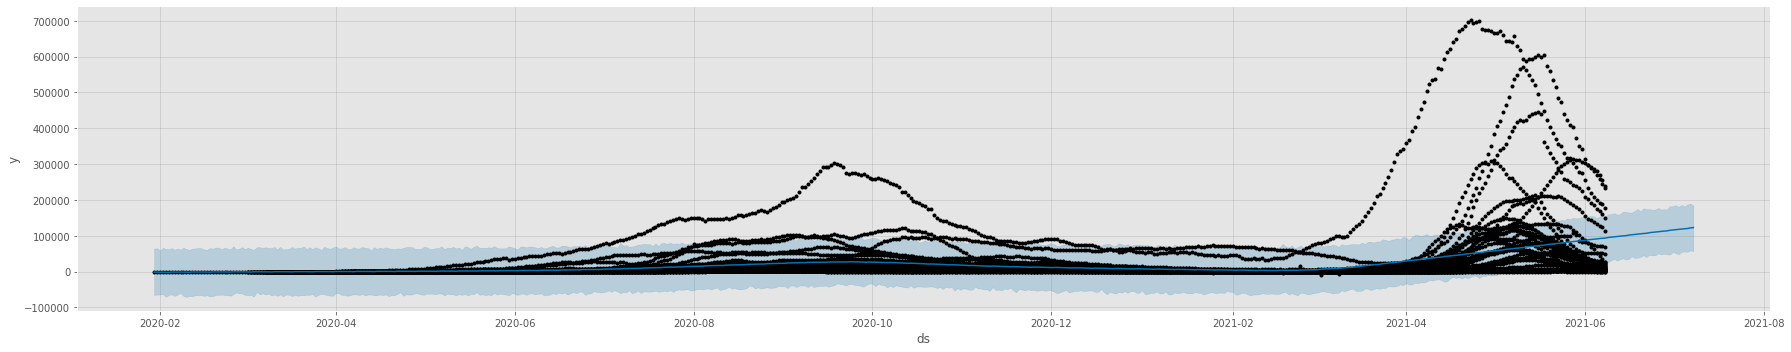

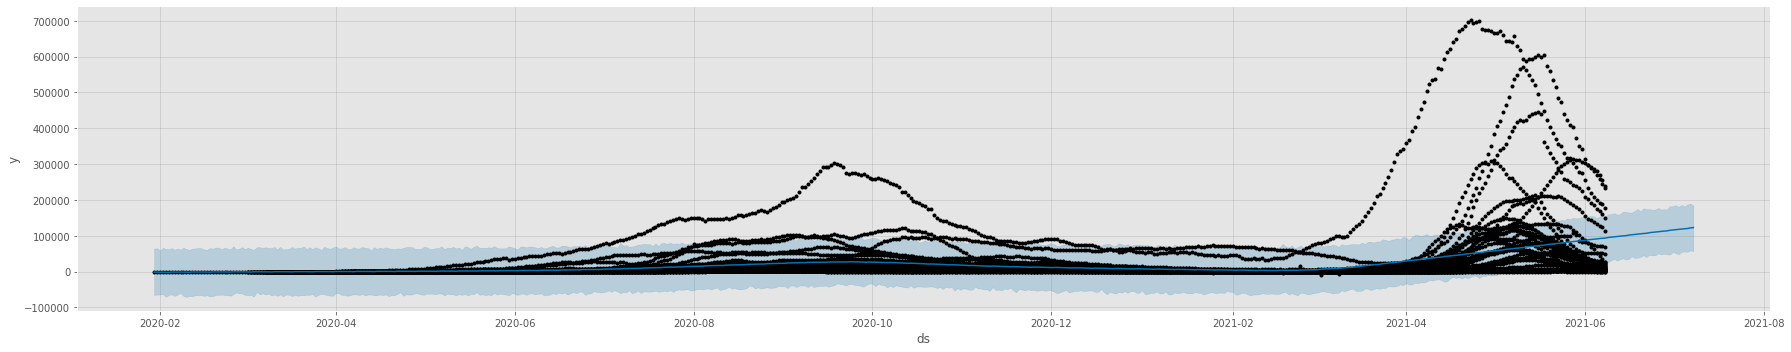

In [89]:
#Forecasting using FbProphet for 30 days
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df3)
x = model.make_future_dataframe(periods = 30,freq='D')
forecast = model.predict(x)
df3= forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
model.plot(forecast,figsize=(25,5))

In [90]:
print("1.State Having Highest Number Of Cases \n", end="")
print(Total_Active_Cases.iloc[0,:])

print("\n2.State Having Lowest Number Of Cases \n\n ", end="")
print(Total_Active_Cases.iloc[-1,:])

print("\n3.State Having Highest Number Of Deaths \n\n",end="")
print(Total_Death_Cases.iloc[0,:])

print("\n4.State Having Lowest Number Of Deaths \n\n",end="")
print(Total_Death_Cases.iloc[-1,:])

print("\n5.State Is Most Vaccinated \n\n",end="")
print(Total_vaccinated.iloc[0])

1.State Having Highest Number Of Cases 
Total Cases    5954508
Name: Maharashtra, dtype: int64

2.State Having Lowest Number Of Cases 

 Total Cases    7363
Name: Andaman and Nicobar, dtype: int64

3.State Having Highest Number Of Deaths 

Deaths    116674
Name: Maharashtra, dtype: int64

4.State Having Lowest Number Of Deaths 

Deaths    45
Name: Lakshadweep, dtype: int64

5.State Is Most Vaccinated 

Total Vaccinated    1.036216e+09
Name: Maharashtra, dtype: float64
